In [1]:
from pymodbus.client import AsyncModbusSerialClient
import asyncio
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

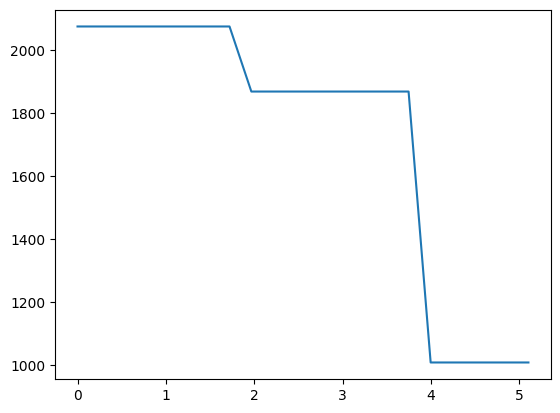

In [ ]:
# Create client with parameters from datasheet and connect
client = AsyncModbusSerialClient(port='COM4',
                                baudrate=9600,
                                bytesize=8,
                                parity='N',
                                stopbits=1)
await client.connect()
# Create measurement lists
measurements = list()
times = list()
# Set WMaxLimPct register to 500 (5%=1kW)
await client.write_register(40242,500)
# Wait a bit before starting test
await asyncio.sleep(3)
# Set WMaxLim_Ena register to 1 (On)
await client.write_register(40246,1)
for i in range(20):
    # Read AC Power registers and save timestamp
    times.append(dt.datetime.now())
    measurements.append(
        await client.read_holding_registers(40091,count=2))
# Set WMaxLim_Ena register to 0 (OFF) and close cleint
await client.write_register(40246,0)
client.close()
# Create plotting arrays
ys = np.zeros(len(measurements))
xs = np.array([(time-times[0]).total_seconds() for time in times])

for i in range(len(measurements)):
    # Convert pymodbus objects to float values
    ys[i] = client.convert_from_registers(
        measurements[i].registers,client.DATATYPE.FLOAT32)

Text(0, 0.5, 'MEasured AC power [W]')

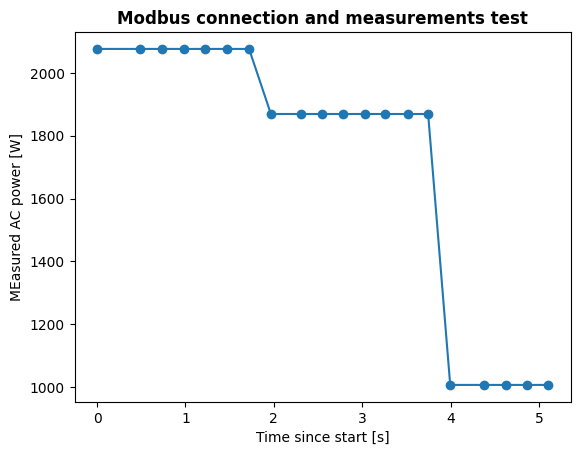

In [41]:
plt.plot(xs,ys,marker='o')
plt.title('Modbus connection and measurements test',weight='bold')
plt.xlabel('Time since start [s]')
plt.ylabel('MEasured AC power [W]')


In [ ]:
client.write_register

In [36]:
client.close()

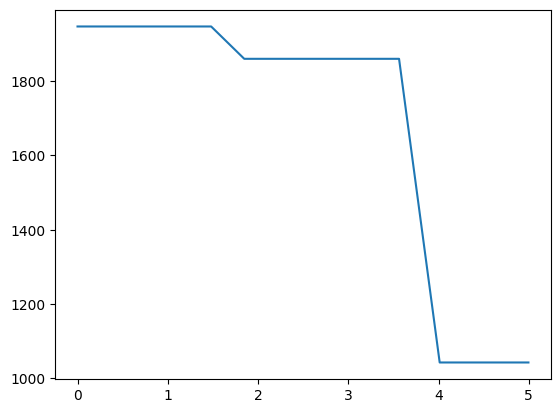

In [19]:
meas = np.zeros(len(measurements))
ts = np.array([(time-times[0]).total_seconds() for time in times])
for i in range(len(measurements)):
    meas[i] = client.convert_from_registers(measurements[i].registers,client.DATATYPE.FLOAT32)
plt.plot(ts,meas)

In [20]:
ts

array([0.      , 0.248177, 0.481495, 0.731254, 0.964342, 1.214475,
       1.480668, 1.847336, 2.080354, 2.329914, 2.581294, 2.829829,
       3.081057, 3.330671, 3.562411, 4.012522, 4.262403, 4.512853,
       4.762392, 4.995757])